#Demonstração 01 - VocalVision

## Introdução

O propósito desta demonstração é ilustrar a concepção e implementação de um fluxo de processamento para dados não estruturados, visando a transformação de imagens em áudios descritivos. Este processo exemplifica a criação uma ferramenta que permite pessoas com deficiência visual acessar informações visuais de forma auditiva.

Não se preocupe com a codificação envolvida. O foco principal é demonstrar que, para desenvolver um fluxo eficiente, é necessário decompor o problema em etapas:

1. __Desenvolvimento de uma Pipeline de Processamento (Imagem para Descrição):__ Esta etapa é dedicada à construção de um sistema que analisa e interpreta imagens, convertendo-as em descrições textuais. Aqui, técnicas de visão computacional e IA são aplicadas para reconhecer e descrever os elementos presentes nas imagens.
2. __Conversão do Texto Produzido em Áudio (Texto para Fala):__ Com as descrições textuais obtidas na primeira etapa, o próximo passo é transformá-las em áudio. Utilizando tecnologias de síntese de voz, estas descrições são convertidas em arquivos de áudio, que podem ser reproduzidos em uma aplicação destinada ao usuário final.

Você pode executar este laboratório de forma interativa utilizando o [Google Colab](https://colab.research.google.com/) através deste [link](https://colab.research.google.com/github/Secol/fiap-amd/blob/main/demo01/demo01_vocalvision.ipynb).

## VocalVision

VocalVision é uma solução de Inteligência Artificial inovadora projetada para transformar imagens em descrições faladas. Este sistema é particularmente útil para pessoas com deficiência visual, permitindo-lhes compreender o conteúdo visual através do áudio. A seguir, detalho suas características principais:

__Reconhecimento de Imagem:__ VocalVision utiliza algoritmos de aprendizado de máquina para analisar e interpretar imagens.

__Geração de Descrição Textual:__ Após a análise da imagem, o sistema gera uma descrição detalhada do que foi identificado.

__Síntese de Voz Natural:__ A descrição é convertida em áudio usando tecnologia de síntese de voz.

__Interface Fácil de Usar:__ Pensando na acessibilidade, a interface de VocalVision é simples e intuitiva.

![Aplicação](https://github.com/Secol/fiap-amd/blob/main/demo01/assets/vocalvision.png?raw=true)

## Arquitetura

![Arquitetura](https://github.com/Secol/fiap-amd/blob/main/demo01/assets/diagrama-branco.png?raw=true)

## Fluxo de Processamento

A solução de IA que estamos desenvolvendo é um exemplo clássico de IA fraca, onde um conjunto de modelos de ML, cada um com sua especialização, trabalha em conjunto para realizar uma tarefa complexa. Ao contrário de tentar criar uma máquina que imite a inteligência humana como um todo (IA forte), estamos combinando modelos de IA estreita para criar uma solução eficaz que atenda a necessidade de acessibilidade.

![fluxo de processamento da imagem](https://github.com/Secol/fiap-amd/blob/main/demo01/assets/fluxo-processamento-fb.png?raw=true)

Este fluxograma descreve o processo que vamos implementar em duas pipelines de processamento distintas: uma para converter a __imagem em texto descritivo__ e outra para converter __texto em fala__:

__Pipeline - Imagem para Descrição Textual:__

1. __Evento nova-imagem:__ Inicialmente, uma imagem é submetida ao sistema, isso indica o início do processo, gerando um evento que propaga as informações desta imagem para o fluxo.

2. __Processamento da Imagem:__ O arquivo é processado inicialmente, o que pode incluir redimensionamento, normalização, e outras transformações para preparar a imagem para a análise pelo modelo de visão computacional.

3. __Modelo Visão Computacional:__ Este é um modelo de Machine Learning especializado em entender e interpretar imagens. Ele analisa a imagem processada e extrai características visuais e informações relevantes.

4. __Primeiro Output com propriedades:__ O modelo de visão computacional gera um output que inclui propriedades identificadas na imagem, como objetos, ações, cenários, etc.

5. __Modelo Processamento de Linguagem Natural:__ Este modelo pega as informações visuais extraídas e as converte em texto. Ele utiliza técnicas de NLP (Natural Language Processing) para formar frases que descrevem o conteúdo da imagem de maneira coesa e natural.

6. __Segundo Output com propriedades:__ O resultado é um texto descritivo que contém as propriedades identificadas na imagem de entrada.

7. __Processamento da saída:__ Pode haver um passo adicional de processamento do texto gerado, como correção gramatical antes de ser finalizado.

O resultado final deste fluxo é uma descrição textual da imagem, como o exemplo dado: _"a dog surfing with sunglasses"._

__Pipeline - Texto para Fala:__

1. __Evento nova-descrição:__ Este evento desencadeia o processo de conversão de __texto em fala__, começando com a descrição textual gerada anteriormente.

2. __Processamento de texto:__ O texto pode ser processado para otimizar a conversão para fala, o que pode incluir ajustes na pontuação e na estrutura da frase para melhorar a naturalidade da fala gerada.

3. __Modelo Texto para Fala:__ Um modelo de síntese de voz (também conhecido como TTS - Text-to-Speech) recebe o texto e o converte em fala. Esse modelo pode incluir diferentes vozes, entonações e idiomas.

4. __Primeiro Output com propriedades:__ A saída aqui é o áudio gerado com propriedades como taxa de fala, entonação e outros atributos que afetam a qualidade do áudio.

5. __Processamento da saída:__ Após a geração do áudio, pode haver um estágio de processamento adicional para melhorar a qualidade do som ou para adicionar efeitos, neste exemplo codificamos a saída do modelo em um arquivo `mp3`.

O resultado final é um arquivo de áudio que reproduz a descrição textual da imagem em forma falada.

## Demonstração

In [1]:
!pip install gtts deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 750.6 kB/s eta 0:00:00


1. __Instalação de bibliotecas adicionais:__

- `pip`: É o sistema de gerenciamento de pacotes usado para instalar e gerenciar pacotes de software escritos em Python. Quando você executa `pip install`, você está chamando o `pip` para instalar um ou mais pacotes.

- `gtts`: "gTTS" é a sigla para "Google Text-to-Speech". É uma biblioteca Python que atua como uma interface para o serviço de Text-to-Speech do Google, permitindo que você converta texto em fala em vários idiomas. A fala gerada pode ser salva como um arquivo de áudio MP3.

- `deep-translator`: Esta é uma biblioteca Python que fornece interfaces para várias APIs de tradução automática, incluindo Google Translate, Microsoft Translate e outros. Ela permite traduzir textos de um idioma para outro.

Ao executar esse comando, pip instalará as versões mais recentes das bibliotecas gtts e deep-translator e suas dependências. Importante observar que se você tentar executar este notebook em um ambiente diferente do Google Colab, talvez seja necessário instalar outras bibliotecas e dependências.

In [2]:
# Importa a biblioteca warnings
import warnings
warnings.filterwarnings('ignore') # Configura o ambiente para ignorar mensagens de warning

import requests # Permite realizar requisições HTTP
from PIL import Image # Importa a classe Image da biblioteca Pillow utilizada para manipulação de imagens
from io import BytesIO # Importa a classe BytesIO do módulo io, utilizada para manipular fluxos binários (bytes) em memória
import matplotlib.pyplot as plt # Importa o módulo pyplot da biblioteca matplotlib. matplotlib é uma biblioteca de plotagem gráfica
from transformers import pipeline # Importa a função pipeline da biblioteca transformers, amplamente utilizada para tarefas de processamento de linguagem natural
from gtts import gTTS # Importa a classe gTTS da biblioteca gtts, que é uma interface da linguagem para o serviço Google Text-to-Speech
import uuid # Importa o módulo uuid, que é utilizado para gerar Universal Unique Identifiers (UUIDs)
from IPython.display import Audio # mporta a classe Audio do módulo IPython.display, que permite criar um elemento de áudio que pode ser reproduzido diretamente em um Notebook
from deep_translator import GoogleTranslator # Importa a classe GoogleTranslator da biblioteca deep_translator, que fornece uma interface para a API do Google Translate

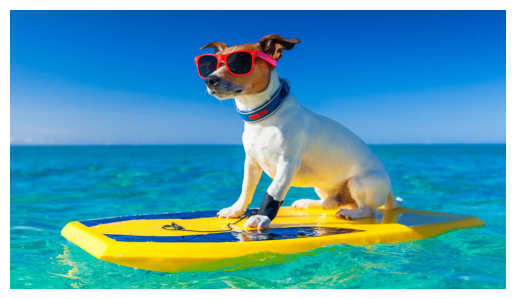

In [3]:
# URL da imagem
IMAGE_URL = 'https://rotasdeviagem.com.br/wp-content/uploads/2022/02/pode-levar-cachorro-para-a-praia-dicas.jpg'

# Baixar a imagem da URL
response = requests.get(IMAGE_URL)
image = Image.open(BytesIO(response.content))

# Exibe a imagem
plt.imshow(image)
plt.axis('off')
plt.show()

2. __Definição da URL da Imagem:__
  
- `IMAGE_URL`: Define a URL da imagem que será baixada. Neste exemplo, é uma imagem de um cachorro surfando.

3. __Baixando a Imagem da URL:__
  
- `response = requests.get(IMAGE_URL)`: Usa a biblioteca `requests` para fazer uma requisição __HTTP GET__ à URL especificada. O resultado (conteúdo da resposta) é armazenado na variável response.
- `image = Image.open(BytesIO(response.content))`: A resposta contém os dados da imagem (em bytes), que são passados para `BytesIO` para criar um stream de bytes. Esse stream é então usado por Image.open para abrir a imagem.

4. __Exibindo a Imagem:__
  
- `plt.imshow(image)`: Utiliza a função imshow de matplotlib.pyplot para exibir a imagem.
- `plt.axis('off')`: Desativa os eixos da imagem, pois não são necessários para a visualização da imagem em si.
- `plt.show()`: Mostra a imagem plotada. Este comando efetivamente exibe a imagem na tela.

## Pipeline de Processamento __Imagem para Descrição__

In [4]:
img_to_text_pipeline = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
text_output = img_to_text_pipeline(IMAGE_URL)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

5. __Criação da Pipeline de Imagem para Texto:__
  
- `img_to_text_pipeline = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")`: Aqui, uma pipeline de "imagem para texto" é criada usando um modelo específico. O primeiro argumento `"image-to-text"` especifica o tipo de tarefa que a pipeline vai realizar, que é converter imagens em texto. O segundo argumento `model="Salesforce/blip-image-captioning-base"` especifica o modelo pré-treinado a ser utilizado. Neste caso, é usado o modelo `blip-image-captioning-base` da __Salesforce__, que é especializado em gerar legendas para imagens. Você pode obter mais informações sobre este modelo neste [link](https://huggingface.co/Salesforce/blip-image-captioning-base).

6. __Geração de Legenda para uma Imagem:__
  
- `text_output = img_to_text_pipeline(IMAGE_URL)`: Esta linha aplica a pipeline à uma imagem. `IMAGE_URL` deve ser uma string contendo o caminho para a imagem ou a URL da imagem. A pipeline processa a imagem e retorna a descrição gerada como texto. O resultado é armazenado na variável `text_output`.

In [5]:
text_output

[{'generated_text': 'a dog wearing sunglasses on a surfboard'}]

In [6]:
text_output[0]['generated_text']

'a dog wearing sunglasses on a surfboard'

O fim da pipeline __Imagem para Texto__ produz uma `string` com a descrição gerada pelo fluxo. A publicação desta `string` cria o evento `nova-descricao` que, por sua vez, inicia a pipeline __Texto para Fala__.

In [7]:
# Criar um objeto gTTS com o texto de saída
tts = gTTS(text_output[0]['generated_text'], lang='en')

# Salvar o arquivo de áudio
audio_file_en = "exemplo_audio.mp3"
tts.save(audio_file_en)

print(f"Arquivo de áudio gerado: {audio_file_en}")

Arquivo de áudio gerado: exemplo_audio.mp3


## Pipeline de Processamento __Texto para Fala__

7. __Criação da Pipeline Texto para Fala:__

- `tts = gTTS(text_output[0]['generated_text'], lang='en')`: Iniciamos um novo agente `gTTS` fornecendo o texto gerado pela pipeline anterior. O áudio que será produzido é armazenado na variável `tts`.
- `tts.save(audio_file_en)`: Criamos um arquivo com o nome `exemplo_audio.mp3`. Você pode verificar que após executar a linha de código, o arquivo será criado no ambiente.

In [8]:
# Reproduzir o áudio no Jupyter Notebook
Audio(audio_file_en)

8. __Reprodução do áudio:__

- `Audio(audio_file_en)`: Permite reproduzir um arquivo de áudio através de um Notebook.

## Bonus - Tradução para Português

A maioria dos modelos avançados de geração de descrição para imagens são treinados predominantemente com dados em inglês. Isso significa que eles geram descrições principalmente nesse idioma. Para obter a descrição em português uma alternativa é utilizar algum método de tradução. Neste exemplo, utilizaremos a API do Google Translator para realizar a tradução.

In [9]:
# Traduzir para português
translated_text = GoogleTranslator(source='auto', target='pt').translate(text_output[0]['generated_text'])
print(translated_text)

um cachorro usando óculos escuros em uma prancha de surf


8. __Tradução para Português__

- `GoogleTranslator(source='auto', target='pt')`: Cria uma instância do `GoogleTranslator`, que é uma classe da biblioteca `deep_translator`. O parâmetro `source='auto'` instrui o tradutor a detectar automaticamente o idioma do texto de origem. O parâmetro `target='pt'` define o idioma de destino da tradução como português.
- `.translate(text_output[0]['generated_text'])`: Chama o método translate na instância do tradutor para traduzir o texto especificado. O texto que está sendo traduzido é obtido a partir do dicionário `text_output`, acessando o primeiro elemento da lista (ou o primeiro elemento de um possível resultado de pipeline de processamento de texto) com `text_output[0]` e depois acessando a chave `'generated_text'`, que se presume conter o texto gerado que se deseja traduzir.
- `translated_text`: A variável `translated_text` recebe o texto traduzido retornado pelo método translate.

In [10]:
tts = gTTS(translated_text, lang='pt')

# Salvar o arquivo de áudio
audio_file_pt_br = "exemplo_audio_pt_br.mp3"
tts.save(audio_file_pt_br)

print(f"Arquivo de áudio gerado: {audio_file_pt_br}")
Audio(audio_file_pt_br)

Arquivo de áudio gerado: exemplo_audio_pt_br.mp3


In [11]:
# Define uma função para executar o fluxo demonstrado acima, por padrão o
# áudio é gerado na língua inglesa
def image_to_audio(img_url, translate=False):
    # Cria um id único para ser utilizado como nome do arquivo de output
    file_name = uuid.uuid4()

    # Baixa a imagem da URL
    response = requests.get(img_url)
    image = Image.open(BytesIO(response.content))
    # Exibe a imagem
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Pipeline Imagem para texto
    text_output = img_to_text_pipeline(img_url)[0]['generated_text']

    # Retorna feedback do texto de descrição original
    print(f'Descrição gerada: {text_output}')

    if translate: # Se translate é positivo, traduz o texto para o portugês
        text_output = GoogleTranslator(source='auto', target='pt').translate(text_output)
        # Retorna feedback do texto após tradução
        print(f'Tradução gerada: {text_output}')
        # Cria o arquivo de áudio a partir do texto em text_output
        tts = gTTS(text_output, lang='pt')
    else:
        # Cria o arquivo de áudio a partir do texto em text_output
        tts = gTTS(text_output, lang='en')
    # Salva o arquivo em disco
    tts.save(f'{file_name}.mp3')
    # Retorna feedback do arquivo de áudio gerado
    print(f'Arquivo gerado: {file_name}.mp3')

    # Retorna a string com o nome do arquivo
    return f'{file_name}.mp3'

A função `image_to_audio` é um exemplo de como integrar várias bibliotecas e serviços para criar um fluxo de trabalho completo de processamento de imagem para áudio. Esta função toma uma `URL` de imagem como entrada e, opcionalmente, traduz a descrição gerada para o português antes de criar um arquivo de áudio.

## Outros Exemplos

Abaixo demonstramos a capacidade do fluxo de processar imagens de diferentes complexidades de descrição. Experimente fornecer outras URLs de imagem para testar a capacidade do fluxo.

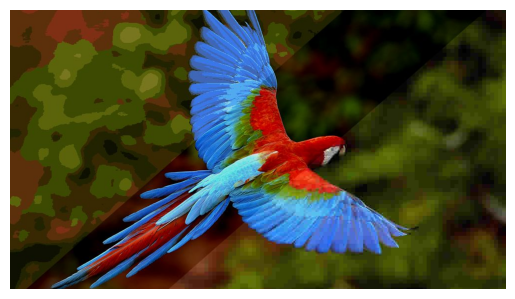

Descrição gerada: a colorful parrot flying in the air
Arquivo gerado: 8f61f44b-80cc-43de-95ff-12469cad7a42.mp3


In [12]:
image_url = 'https://t.ctcdn.com.br/HfaAfdSP0yElfXWQelkeEQvkgyU=/1000x563/smart/i257652.jpeg'
Audio(image_to_audio(image_url))

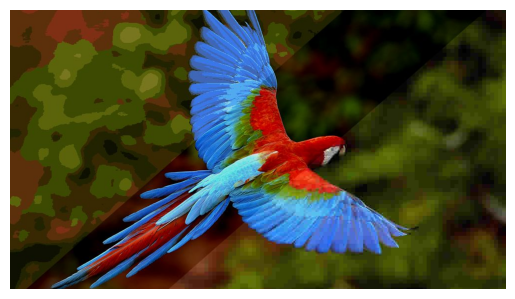

Descrição gerada: a colorful parrot flying in the air
Tradução gerada: um papagaio colorido voando no ar
Arquivo gerado: 1e473e57-1610-4b69-b3bd-c9688e4cf5c0.mp3


In [13]:
image_url = 'https://t.ctcdn.com.br/HfaAfdSP0yElfXWQelkeEQvkgyU=/1000x563/smart/i257652.jpeg'
Audio(image_to_audio(image_url, True))

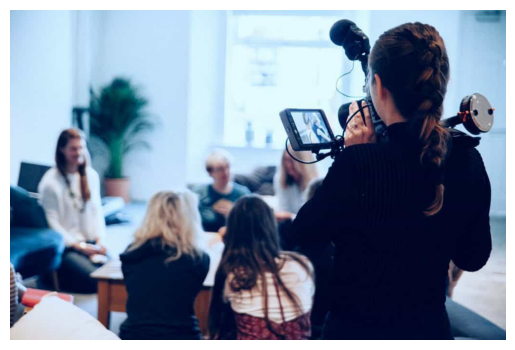

Descrição gerada: a woman recording a video in a conference room
Tradução gerada: uma mulher gravando um vídeo em uma sala de conferências
Arquivo gerado: 8782472d-34c7-4953-885a-2a9202bf3e92.mp3


In [14]:
image_url = 'https://www.aurum.com.br/blog/wp-content/uploads/2021/07/direito-de-imagem-scaled-e1593466118280.jpg'
Audio(image_to_audio(image_url, True))

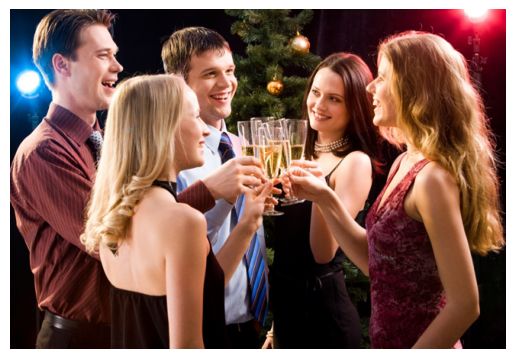

Descrição gerada: a group of people standing around a christmas tree
Tradução gerada: um grupo de pessoas em volta de uma árvore de natal
Arquivo gerado: 7f4e600f-fcfe-4847-9c24-8d87ed40acb4.mp3


In [15]:
image_url = 'https://hotelrealexecutive.com.br/wp-content/uploads/2019/10/festa-de-fim-de-ano.jpg'
Audio(image_to_audio(image_url, True))

## Conclusão

Ao longo desta demonstração, exploramos e implementamos um processo de Inteligência Artificial (IA) representativo da IA Fraca, demonstrando a capacidade de resolver tarefas específicas e bem definidas por meio de tecnologias avançadas. O racional e as metodologias aplicadas aqui podem ser estendidas para implementar outros fluxos de processamento que envolvem diferentes capacidades de IA.

Em última análise, esta demonstração reforça a importância de decompor problemas complexos em subproblemas gerenciáveis, abordando-os com modelos de IA especializados. A integração desses componentes especializados, alinhados com a visão de IA Fraca, nos permite resolver problemas específicos com eficiência, abrindo caminhos para inovações futuras em diversos domínios.